TimeSeries from: ./Test/SmallData.csv
 Header(labeled):
    value  anomaly
0  12183        0
1  12715        0
2  12736        0 
Header(unlabeled):
    value
0  12183
1  12715
2  12736 
Rows:
 1439
MeanValue:
 11020.08
MaxValue:
 170029
MinValue:
 3594
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 50        
Total params: 1,874
Trainable params: 1,874
Non-trainable params: 0
_________________________________________________________________
None
Successfully 

C:\Users\nils\Anaconda3\envs\master2020\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


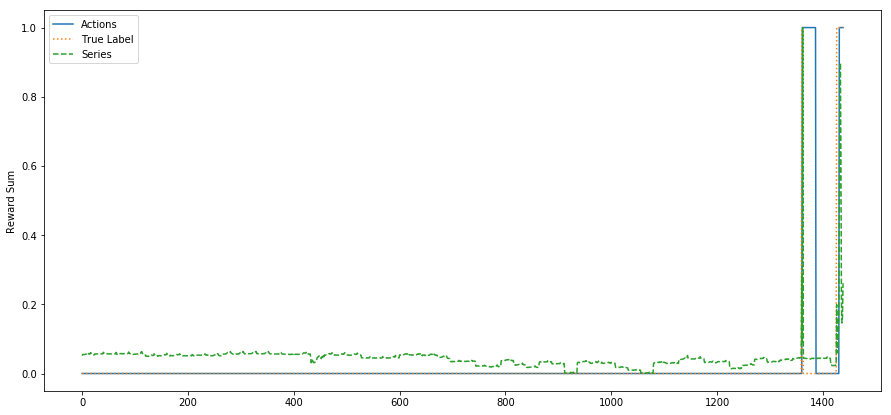

True

In [2]:
import tensorflow as tf
from agents.MemoryBuffer import MemoryBuffer
from agents.NeuralNetwork import NeuralNetwork
from agents.Simulator import Simulator
from agents.SlidingWindowAgent import SlidingWindowAgent
from environment.Config import ConfigTimeSeries
from environment.TimeSeriesModel import TimeSeriesEnvironment
from environment.WindowStateEnvironment import WindowStateEnvironment

#tf.compat.v1.disable_eager_execution()
# Create the agent
# Test on complete Timeseries from SwAT
# for subdir, dirs, files in os.walk("../ts_data/A1Benchmark"):
#     for file in files:
#         if file.find('.csv') != -1:
#             env = TimeSeriesEnvironment(verbose=True, filename="./A1Benchmark/{}".format(file), config=config,
#                                         window=True)
#             env.statefunction = BatchLearning.SlideWindowStateFuc
#             env.rewardfunction = BatchLearning.SlideWindowRewardFuc
#             env.timeseries_cursor_init = BatchLearning.SLIDE_WINDOW_SIZE
#
#             dqn = DDQNWAgent(env.action_space_n, 0.001, 0.9, 1, 0, 0.9)
#             dqn.memory.init_memory(env)
#             simulation = Simulator(11, dqn, env, 5)
#             simulation.run()

config = ConfigTimeSeries(seperator=",", window=1)
env = WindowStateEnvironment(
    TimeSeriesEnvironment(verbose=True, filename="./Test/SmallData.csv", config=config, window=True))

dqn = NeuralNetwork(input_dim=env.window_size,
                    input_neurons=env.window_size + 1).keras_model

agent = SlidingWindowAgent(dqn=dqn, memory=MemoryBuffer(max=50000, id="sliding_window"), alpha=0.001,
                           gamma=0.99, epsilon=1.0,
                           epsilon_end=0.0, epsilon_decay=0.9, fit_epoch=2, action_space=2, batch_size=512)
simulation = Simulator(10, agent, env, 5)
agent.memory.init_memory(env=env)
simulation.run()